![A soccer pitch for an international match.](soccer-pitch.jpg)
 This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question we are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [27]:
# Start your code here!
import pandas as pd

men_data = pd.read_csv('men_results.csv')
women_data = pd.read_csv('women_results.csv')
men_data['date'] = pd.to_datetime(men_data['date'])
women_data['date'] = pd.to_datetime(women_data['date'])

men_data = men_data[(men_data['tournament'] == 'FIFA World Cup') & (men_data['date'] >= '2002-01-01')]
women_data = women_data[(women_data['tournament'] == 'FIFA World Cup') & (women_data['date'] >= '2002-01-01')]

print(men_data)


       Unnamed: 0       date  ... away_score      tournament
25164       25164 2002-05-31  ...          1  FIFA World Cup
25165       25165 2002-06-01  ...          0  FIFA World Cup
25166       25166 2002-06-01  ...          1  FIFA World Cup
25167       25167 2002-06-01  ...          2  FIFA World Cup
25168       25168 2002-06-02  ...          0  FIFA World Cup
...           ...        ...  ...        ...             ...
44343       44343 2022-12-10  ...          2  FIFA World Cup
44345       44345 2022-12-13  ...          0  FIFA World Cup
44346       44346 2022-12-14  ...          0  FIFA World Cup
44350       44350 2022-12-17  ...          1  FIFA World Cup
44352       44352 2022-12-18  ...          3  FIFA World Cup

[384 rows x 7 columns]


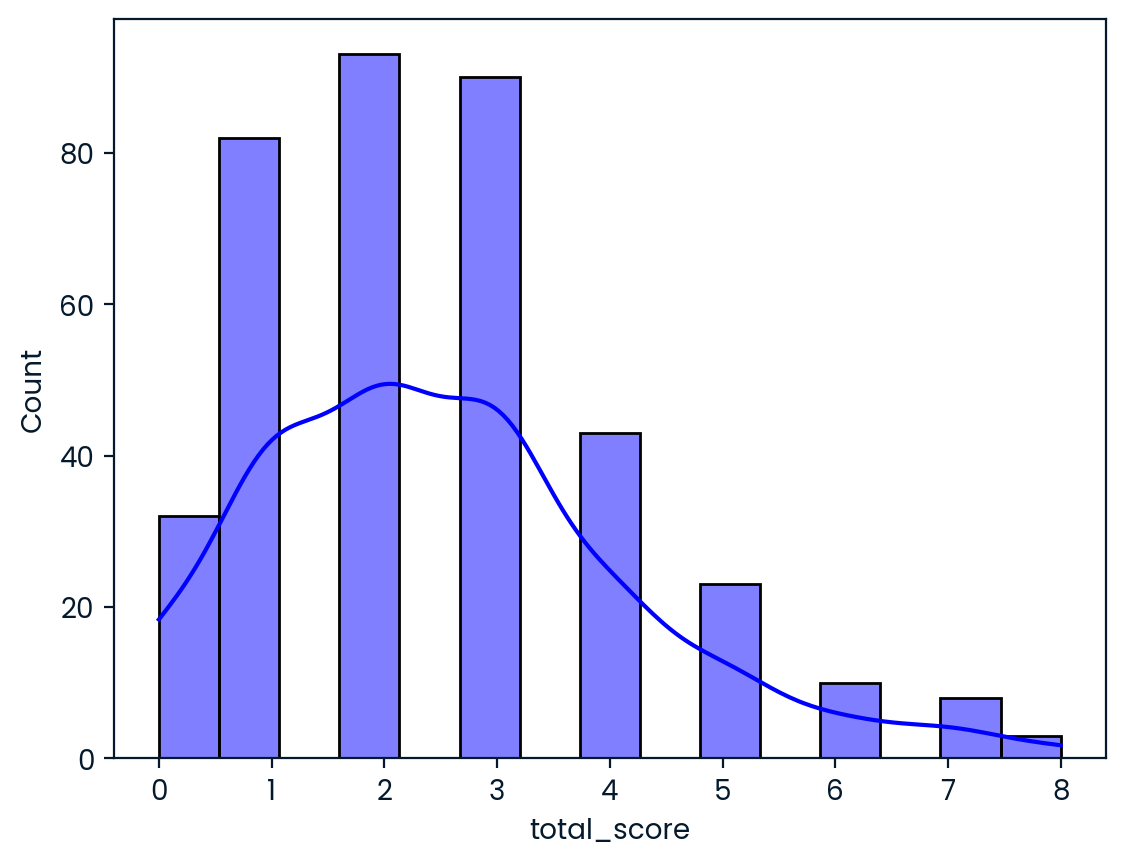

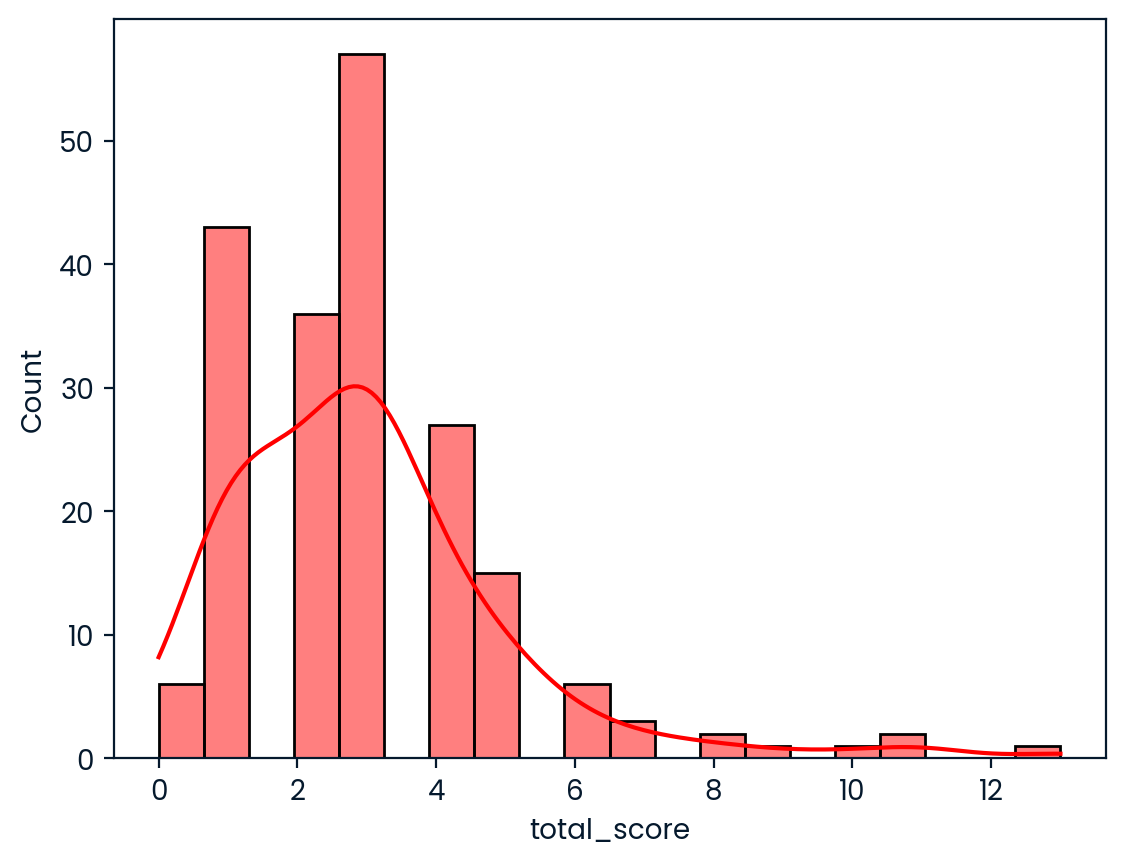

In [28]:
men_data['total_score'] = men_data['home_score'] + men_data['away_score']
women_data['total_score'] = women_data['home_score'] + women_data['away_score']

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(men_data['total_score'], kde=True, label='Men', color='blue')
plt.show()
sns.histplot(women_data['total_score'], kde=True, label='Women', color='red')
plt.show()

In [29]:
import scipy.stats as stats

stat_m, p_val_m = stats.shapiro(men_data['total_score'])
print(f"Shapiro-Wilk Test statistic: {stat_m}")
print(f"Shapiro-Wilk Test p-value: {p_val_m}")

stat_w, p_val_w = stats.shapiro(women_data['total_score'])
print(f"Shapiro-Wilk Test statistic: {stat_w}")
print(f"Shapiro-Wilk Test p-value: {p_val_w}")



Shapiro-Wilk Test statistic: 0.9266489744186401
Shapiro-Wilk Test p-value: 8.894154401688226e-13
Shapiro-Wilk Test statistic: 0.8491013050079346
Shapiro-Wilk Test p-value: 3.8905201759850683e-13


In [30]:
alpha = 0.1
t_stat, p_val = stats.mannwhitneyu(women_data['total_score'], men_data['total_score'], alternative='greater')

result_dict = {'p_val' : p_val, 'result' : 'reject'}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
